# Simulating Millikan Oil Drop Data

This notebook is intended to demonstrate the importance of good data in the Millikan oil drop experiment. What makes the data good? Let's explore that. A few things to consider: uncertainty on rise/fall velocities (related to how many up/down tracks you get), number of drops, charge per drop.

I will do a simple approximation to the uncertainty here. Rather than a full error propagation, I will assume there is fractional uncertainty due to the velocities, and "other" fractional uncertainty due to everything else. I will assume these fractional uncertainties add in quadrature. This is NOT a complete error analysis, but it should demonstrate the rough trends.

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

In [6]:
def sim_drops(N_drops=20, v_unc=0.1, other_unc=0.03, trials_per_drop=10,
              N_elec_min=1, N_elec_max=5, plot=False, plot_true_charges=True):
    """
    Create a simulated set of data for the Millikan oil drop experiment.
    
    Parameters
    ----------
    N_drops : int
        Number of oil drops to simulate. Default is 20
    v_unc : float
        Fractional uncertainty on velocity. Default is 0.1 (10%).
    other_unc : float
        Fractional uncertainty on other parameters. Default is 0.03 (3%).
    trials_per_drop : int or float
        Average number of up/down trials per oil drop. Default is 10.
    N_elec_min : int
        Minimum number of electrons to capture. Default is 1.
    N_elec_max : int
        Maximum number of electrons to capture. Default is 5.
    plot : bool
        If True, plot the simulated data. Default is False
    plot_true_charges : bool
        If True, and plot is True, plot the true charges on top 
        of measured. Default is True

    Returns
    -------
    charge_data : array of float
        Simulated measured charges. Length = N_drops.
    charge_unc : array of float
        Simulated uncertainty on charge data. Length = N_drops.
    true_charges : array of int
        The true charge on each drop. Length N_drops.
    """

    qe = constants.e  # fundamental charge in Coulombs
    true_charges = qe * np.random.randint(N_elec_min, N_elec_max, size=N_drops)
    charge_unc = true_charges * np.sqrt(v_unc**2 / trials_per_drop + other_unc**2)
    charge_data = true_charges + charge_unc * np.random.randn(N_drops)
    if plot:
        plt.figure()
        plt.errorbar(np.arange(len(charge_data)), charge_data, yerr=charge_unc, ls='none')
        plt.plot(charge_data, 'o', color='C0', label='Measured')
        plt.xlabel('Droplet number')
        plt.ylabel('Measured Charge (C)')
        if plot_true_charges:
            plt.plot(true_charges, 'x', color='C1', label='True')
            plt.legend()
    return charge_data, charge_unc, true_charges

<IPython.core.display.Javascript object>


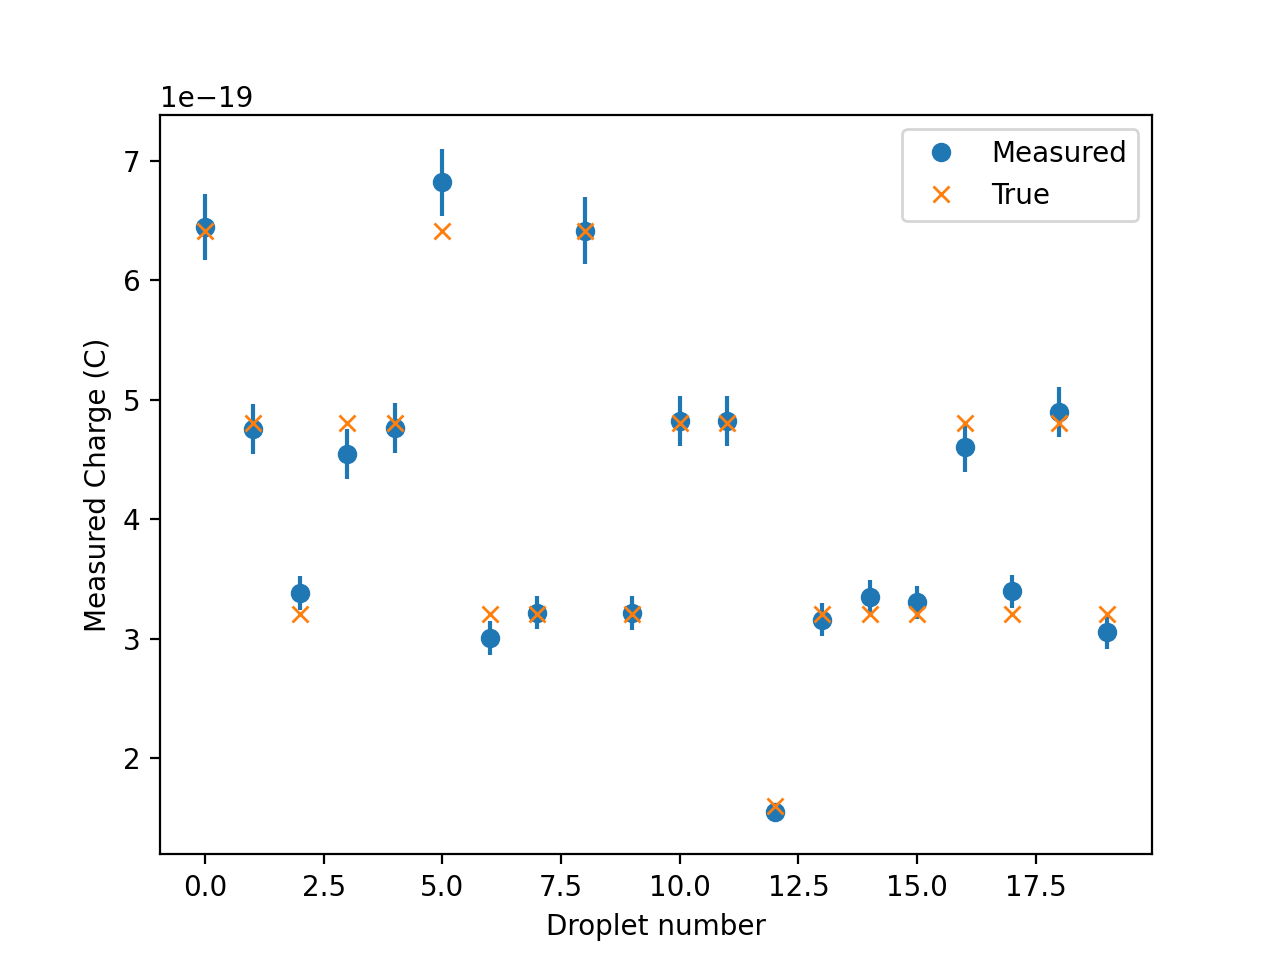

In [7]:
charge_data, charge_unc, true_charges = sim_drops(N_drops=20, v_unc=0.1, other_unc=0.03,
                                                  trials_per_drop=10, N_elec_min=1,
                                                  N_elec_max=5, plot=True)

In [8]:
charge_data / constants.e

array([4.02319376, 2.96638709, 2.111342  , 2.83760099, 2.97478016,
       4.25720291, 1.87603751, 2.00807036, 4.00444738, 2.0066889 ,
       3.01067337, 3.0072891 , 0.96380661, 1.97101643, 2.08948518,
       2.06138806, 2.87246163, 2.11879279, 3.05571924, 1.90643825])

In [9]:
true_charges

array([6.40870654e-19, 4.80652990e-19, 3.20435327e-19, 4.80652990e-19,
       4.80652990e-19, 6.40870654e-19, 3.20435327e-19, 3.20435327e-19,
       6.40870654e-19, 3.20435327e-19, 4.80652990e-19, 4.80652990e-19,
       1.60217663e-19, 3.20435327e-19, 3.20435327e-19, 3.20435327e-19,
       4.80652990e-19, 3.20435327e-19, 4.80652990e-19, 3.20435327e-19])